In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
titanic_train=pd.read_csv(r"C:\Users\PRIYA\Desktop\DATASCIENCE\CASE STUDY\TITANIC\train.csv")

In [192]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
titanic_train.shape

(891, 12)

In [194]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

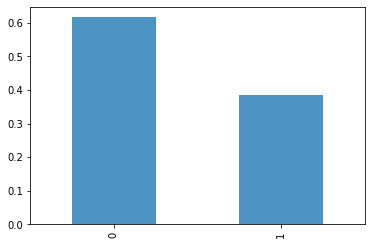

In [197]:
#out of curiosity let's see the percentage of surviving.
titanic_train.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.8)

In [198]:
#about 60% of the people died while only 40% were the people who survied.

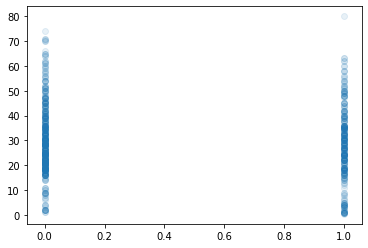

In [199]:
#also let's check the age of the passengers with survived column
plt.scatter(titanic_train.Survived,titanic_train.Age,alpha=0.1)

In [200]:
#from this analysis it is clear that the heaviest % of dying and surviving lies in range between 18 to 60,from this percentage i can even say most of the ticket buyers 
#were in the range of the above category.
#aslo if i look closely i can see that i  the range 38 to 45 survived less,and there's also percentage of minors survivng.
#from this i can say what was the priority at that time.range from 20 to 38.

Text(0.5, 1.0, 'CLASS')

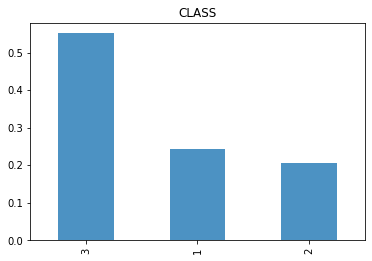

In [201]:
#now from the above reference i will also check what was the class of the people surviving. or the distribution of class,third class was highly distributed(around 55%)
titanic_train.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.8)
plt.title("CLASS")

In [202]:
#check the percentage
titanic_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'men survived')

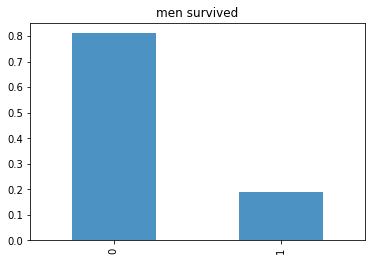

In [203]:
#i forget to check who survived more?men or the women.
titanic_train.Survived[titanic_train.Sex =="male"].value_counts(normalize="True").plot(kind="bar",alpha=0.8)
plt.title("men survived")

In [204]:
#20% male survived.

Text(0.5, 1.0, 'women survived')

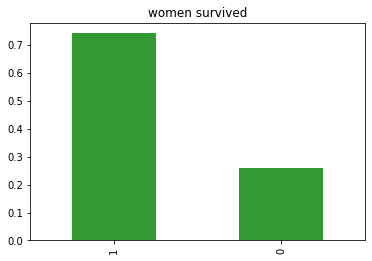

In [205]:
titanic_train.Survived[titanic_train.Sex =="female"].value_counts(normalize="True").plot(kind="bar",alpha=0.8,color="green")
plt.title("women survived")

In [206]:
#approx 70% women survived.

Text(0.5, 1.0, 'sex survived')

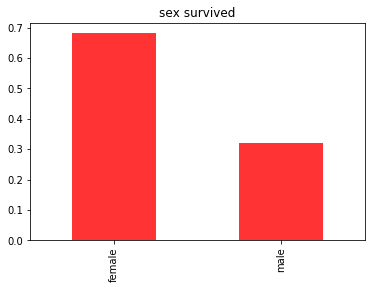

In [207]:
titanic_train.Sex[titanic_train.Survived==1].value_counts(normalize="True").plot(kind="bar",alpha=0.8,color="red")
plt.title("sex survived")

In [208]:
#results are just like movies ,female survied .

In [209]:
#also i checked the % of  sex survival with class feature
titanic_train.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [210]:
#also i can see sex survival by age group
age=pd.cut(titanic_train['Age'],[0,18,80])
titanic_train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

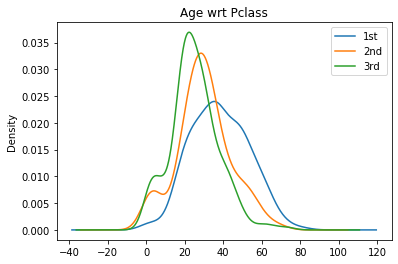

In [211]:
#from above reference class 3 was given the highest priority.
#now another curiosity that i have is what was the age group of 3rd class.
for x in [1,2,3]:
    titanic_train.Age[titanic_train.Pclass==x].plot(kind="kde")
    plt.title("Age wrt Pclass")
    plt.legend(("1st","2nd","3rd"))

In [212]:
#from kernal density estimation i can see 3rd class was given highest priority with the age group between 18 to 38 ,for 2nd class priority was given to the age group of 
#18 to 40 and for 1st class priority was given to range 18 to 60 in hort all were given priority.

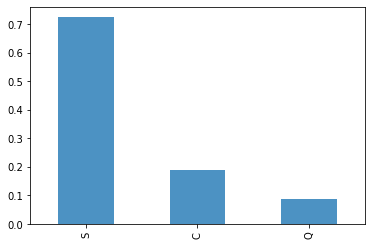

In [213]:
#now let's see the embark column
titanic_train.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.8)

In [214]:
#from this plot i can see most of them were from "S".i.e.,70% were from "S".

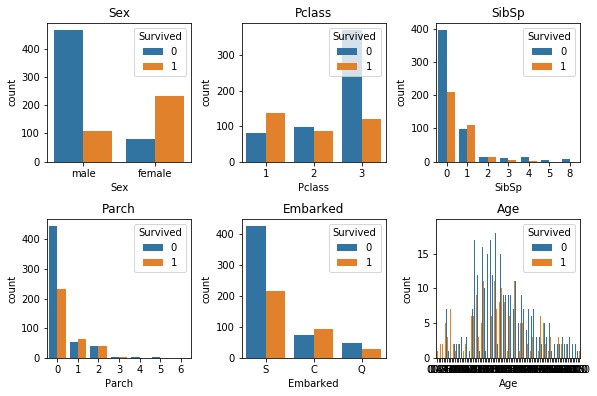

In [215]:
#or to see all plots in one go.
cols=['Sex','Pclass','SibSp','Parch','Embarked','Age']#compulsory needed 6 columns otherwise it throws error.,but that error is neglectable.

n_rows=2
n_cols=3

fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*2.8,n_rows*2.8))

for r in range(0,n_rows):
        for c in range(0,n_cols):
            
            i=r*n_cols+c  #index to go through the numbers of  columns
            ax=axs[r][c]
            sns.countplot(titanic_train[cols[i]],hue=titanic_train['Survived'],ax=ax)
            ax.set_title(cols[i])
            ax.legend(title='Survived',loc='upper right')
            
plt.tight_layout()

Text(0.5, 0, 'Fare')

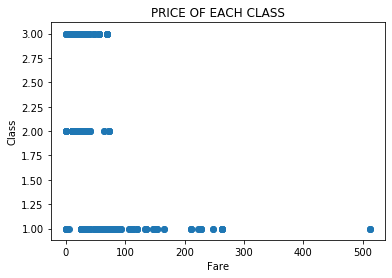

In [216]:
#Let's check the prices column of each class.
plt.scatter(titanic_train['Fare'],titanic_train['Pclass'])
plt.title("PRICE OF EACH CLASS")
plt.ylabel('Class')
plt.xlabel('Fare')


In [217]:
#let's run a small hypothesis test.
titanic_train['Hypt']=0#initially i am assigning all row in hypo feature to zero
titanic_train.loc[titanic_train['Survived']==titanic_train['Hypt'],"Result"]=1
titanic_train['Result'].value_counts()

1.0    549
Name: Result, dtype: int64

In [218]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hypt,Result
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,NaN


In [219]:
titanic_train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [220]:
# i say hypothesis is a good idea to test the data on our hypothesis.

In [221]:
#let's check the missing values.
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Hypt             0
Result         342
dtype: int64

In [222]:
t1=titanic_train.drop(['Cabin','Result','Hypt'],axis=1)

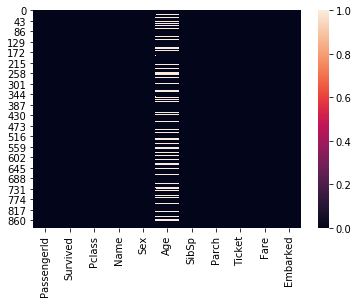

In [223]:
sns.heatmap(t1.isnull())

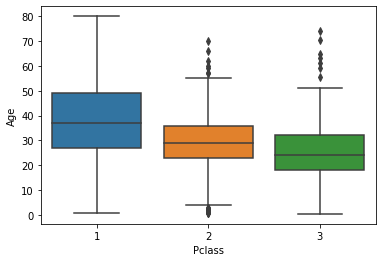

In [224]:
sns.boxplot(x='Pclass',y='Age',data=t1)

how to impute the missing values.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
        
        
        
 #applying function
 
t1['Age'] = t1[['Age','Pclass']].apply(impute_age,axis=1)

In [225]:
#now i am deleting the rows for missing.
t1=t1.dropna(subset=['Age'])

In [226]:
t1.shape

(714, 11)

In [227]:
#also deleting the column which are not required.
t1.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [228]:
t1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [229]:
t1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [230]:
t1=t1.dropna(subset=['Embarked'])

In [231]:
t1.shape

(712, 8)

In [232]:
#now let's  see the datatypes
t1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [233]:
#there are two category that need to be changed into int.
#before converting the data let's see the uniquesness in the column
print(t1['Sex'].unique())
print(t1['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [234]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#encoding the sex column
t1.iloc[:,2]=labelencoder.fit_transform(t1.iloc[:,2].values)
#encoding the embarked column
t1.iloc[:,7]=labelencoder.fit_transform(t1.iloc[:,7].values)

C:\Users\PRIYA\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


2 and 7 represents the column number starting from zero,as shown in dtypes output

In [235]:
print(t1['Sex'].unique())

[1 0]


In [236]:
t1.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [237]:
#splitting the dataset into independent and dependent variable.
X=t1.iloc[:,1:8].values#i left 0 for the dependent variable.
Y=t1.iloc[:,0].values

In [238]:
#training and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [239]:
#create function with many models
def models(X_train,Y_train):
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #knn classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #SVC (linear)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #GaussianNaivebayes classifier
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    
    #print the training accuracy
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print("[1]KNN training accuracy:",knn.score(X_train,Y_train))
    print("[2]Naives training accuracy:",gauss.score(X_train,Y_train))
    print("[3]decision training accuracy:",tree.score(X_train,Y_train))
    print("[4]randomforest training accuracy:",forest.score(X_train,Y_train))
    return log, knn,gauss, tree, forest

In [240]:
#get and train all models
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]KNN training accuracy: 0.8664323374340949
[2]Naives training accuracy: 0.8031634446397188
[3]decision training accuracy: 0.9929701230228472
[4]randomforest training accuracy: 0.9753954305799648


In [241]:
#decision tree and random forest gives the best result

In [242]:
#now the accuracy on test data
#confusion matrix
from sklearn.metrics  import confusion_matrix
for i in range( len(model) ):
    cm=confusion_matrix(Y_test,model[i].predict(X_test))

#extract TN,FP,FN,TP
TN,FP,FN,TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
test_score=(TP+TN)/(TP+TN+FN+FP)
print(cm)
print('Model[{}]Testing Accuracy="{}"'.format(i,test_score))
print()

[[73  9]
 [14 47]]
Model[4]Testing Accuracy="0.8391608391608392"



In [243]:
#model 4 gives the best accuracy i.e random forest classifier

In [244]:
#getting feature importance
import numpy as np
forest=model[4]
importances=pd.DataFrame({'feature':t1.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_, 3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


In [245]:
#print for random forest classifier
pred=model[4].predict(X_test)
print(pred)
print()

#print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


Let's see whether i can survive in that or not?

#Pclass
#Sex
#Age
#SibSp
#Parch
#Fare
#Embarked      #i have taken values according to this specific order.
me_surviving=[[3,1,26,0,0,0,1]]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
me_surviving_scaling=sc.fit_transform(me_surviving)
#print my survival using random forest classifier
pred=model[4].predict(me_surviving_scaling)
print(pred)
#if my prediction is 0 i.e not survivng let's see what we can get.
if pred==0:
    print("You DIED")
else:
    print("YOU SURVIVED")

In [250]:
#noe combining the test data with train data
df_test=pd.read_csv("test01.csv")

In [251]:
df_test.shape

(331, 7)

In [265]:
final_df1=pd.concat([t1,df_test],axis=0)

In [266]:
final_df1.shape

(1043, 8)

In [267]:
#there shouldn't be any duplicates but to be assured fully ,we will do this,
final_df1=final_df1.loc[:,~final_df1.columns.duplicated()]

In [268]:
final_df1.shape

(1043, 8)

In [269]:
final_df1.dtypes

Survived    float64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [271]:
#splitting the data
A=final_df1.iloc[:712,:]#training
B=final_df1.iloc[712:,:]#test

In [272]:
B.drop(["Survived"],axis=1,inplace=True)

C:\Users\PRIYA\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [273]:
B.shape

(331, 7)

In [287]:
x_train=A.drop(['Survived'],axis=1)
y_train=A['Survived']

In [289]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [291]:
print("[1]randomforest training accuracy:",forest.score(x_train,y_train))

[1]randomforest training accuracy: 0.973314606741573


In [305]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [309]:
print("[2]Decision tree accuracy:",tree.score(x_train,y_train))

[2]Decision tree accuracy: 0.9859550561797753


In [310]:
y_pred=tree.predict(B)

In [311]:
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0.

In [315]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)